In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from seaborn import heatmap

sys.path.insert(0, '..')
import ccal

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<15:15:05> Checking library dependencies ...
<15:15:05> Using the following libraries:
<15:15:05> 	scipy (v0.18.0)
<15:15:05> 	statsmodels (v0.6.1)
<15:15:05> 	scikit-learn (v0.17.1)
<15:15:05> 	seaborn (v0.7.1)
<15:15:05> 	rpy2 (v2.8.2)
<15:15:05> 	pandas (v0.18.1)
<15:15:05> 	matplotlib (v1.5.1)
<15:15:05> 	numpy (v1.11.1)
<15:15:05> Planted a random seed 20121020.


In [2]:
from ccal.support import normalize_pandas_object, compare_matrices
from ccal.information import information_coefficient

# Compare MDS using the distance matrix

## Load a H matrix

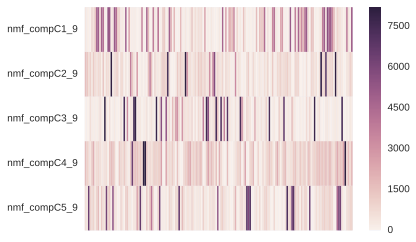

In [25]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
h = h.iloc[:5, :]
heatmap(h, xticklabels=False)

## Compute component x component distance matrix

<16:25:43> Converting association to distance (1 - association) ...


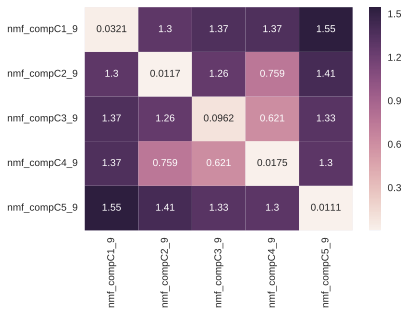

In [26]:
normalized_clipped_h = normalize_pandas_object(normalize_pandas_object(h).clip(-3, 3), method='0-1')
distance_matrix = compare_matrices(normalized_clipped_h, normalized_clipped_h,
                                   information_coefficient, is_distance=True,
                                   report_progress=False)
heatmap(distance_matrix, annot=True, fmt='.3g')

<16:31:00> Converting association to distance (1 - association) ...


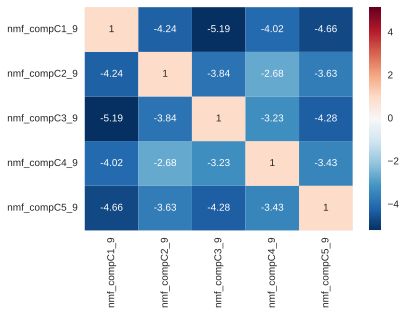

In [39]:
from scipy.spatial import distance

distance_matrix_euclidean = compare_matrices(normalized_clipped_h, normalized_clipped_h, distance.euclidean, is_distance=True, report_progress=False)
heatmap(distance_matrix_euclidean, annot=True, fmt='.3g')

## 1 - IC & Metric MDS

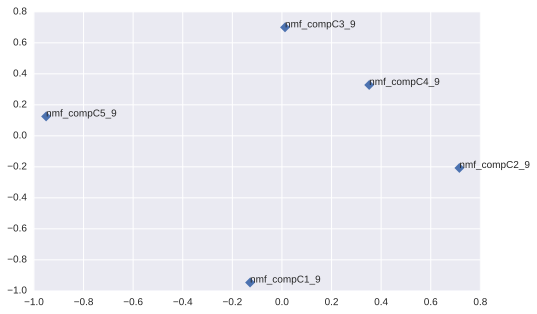

In [32]:
mds = MDS(metric=True, random_state=20121020, dissimilarity='precomputed', n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(distance_matrix)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## 1 - IC& Non-metric MDS. Distances are not preserved as well as metric MDS.

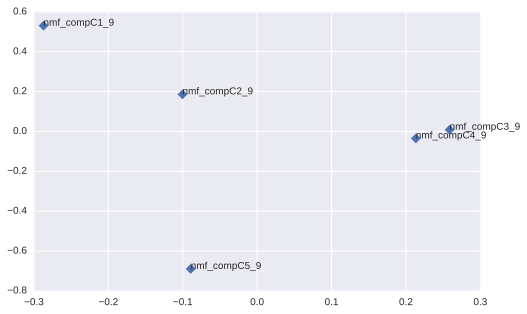

In [33]:
mds = MDS(metric=False, random_state=20121020, dissimilarity='precomputed', n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(distance_matrix)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## Euclidian & Metric MDS

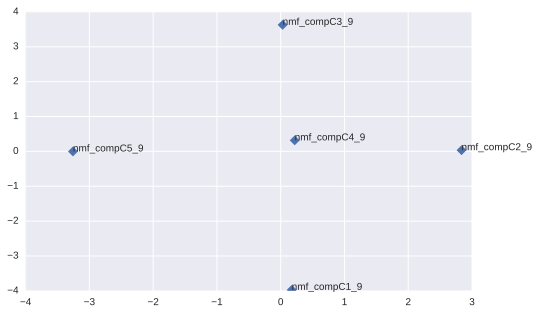

In [34]:
mds = MDS(metric=True, random_state=20121020, n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(normalized_clipped_h)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## Euclidian & Non-metric MDS

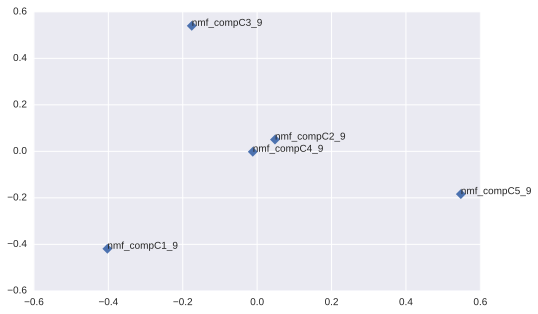

In [36]:
mds = MDS(metric=False, random_state=20121020, n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(normalized_clipped_h)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])